In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("D:/DataScience_Udemy/TensorFlow_FILES/DATA/cancer_classification.csv")

In [4]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


for classification problem it is always good practice to plot count plot with label 

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

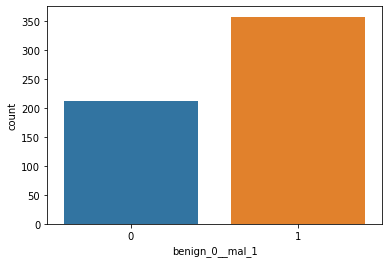

In [13]:
sns.countplot(x='benign_0__mal_1',data=df)

We will work on correlation to see how other features are correlated with our label

In [14]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [21]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

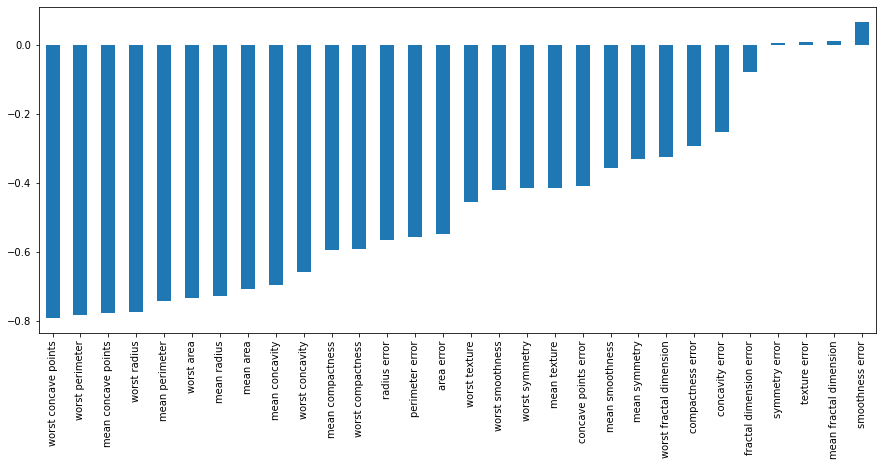

In [26]:
plt.figure(figsize=(15,6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

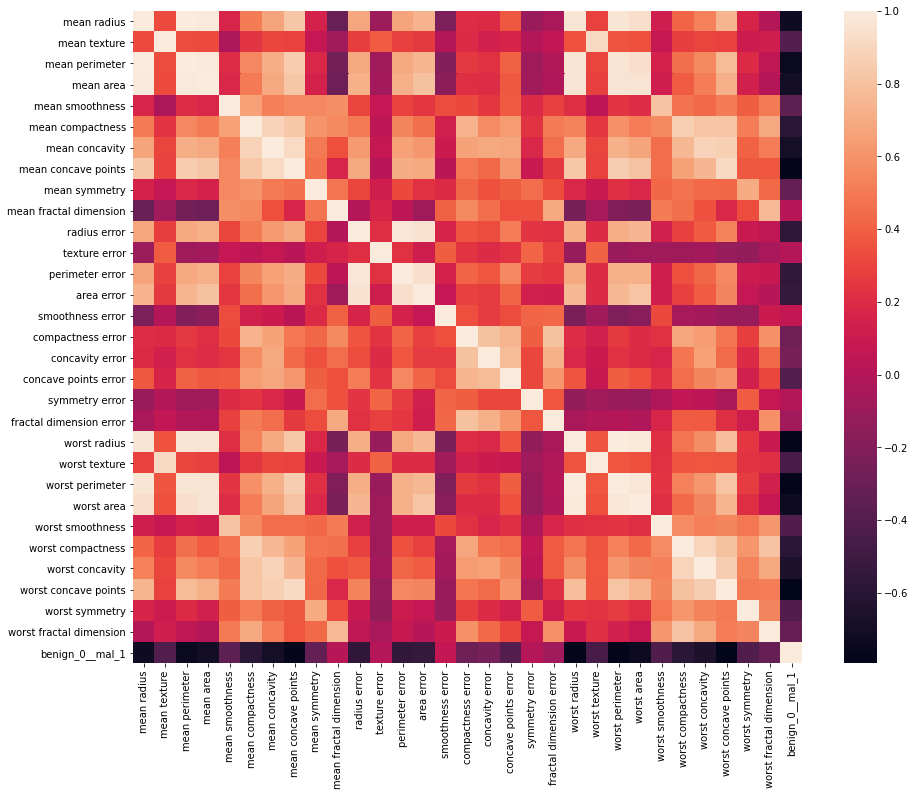

In [29]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr())

In [32]:
X=df.drop('benign_0__mal_1',axis=1)
y=df['benign_0__mal_1']

In [33]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler=MinMaxScaler()

In [43]:
X_train=scaler.fit_transform(X_train)


In [44]:
X_test=scaler.transform(X_test)

In [45]:
from tensorflow.keras.models import Sequentialential

In [46]:
from tensorflow.keras.layers import Dense 

In [47]:
X_train.shape

(426, 30)

In [48]:
model=Sequential()

model.add(Dense(30,activation='relu')) # neuron=30

model.add(Dense(15,activation='relu')) # neuron=15

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid')) # neuron=1  will output 1 or 0 since it's and classification problem last activation is sigmoid

model.compile(loss='binary_crossentropy',optimizer='adam')

In [49]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 16ms/step - loss: 0.7086 - val_loss: 0.6840
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6697 - val_loss: 0.6478
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6307 - val_loss: 0.6137
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5948 - val_loss: 0.5762
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5540 - val_loss: 0.5340
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5092 - val_loss: 0.4858
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4589 - val_loss: 0.4310
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4059 - val_loss: 0.3757
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3570 - val_loss: 0.3251
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3117 - val_loss: 0.2843
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0560 - val_loss: 0.1116
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0553 - val_loss: 0.1077
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0519 - val_loss: 0.1182
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0537 - val_loss: 0.1095
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0524 - val_loss: 0.1080
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0525 - val_loss: 0.1110
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0517 - val_loss: 0.1167
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0507 - val_loss: 0.1058
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0606 - val_loss: 0.1181
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0510 - val_loss: 0.1181
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0428 - val_loss: 0.1386
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0469 - val_loss: 0.1524
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0431 - val_loss: 0.1378
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0426 - val_loss: 0.1346
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0439 - val_loss: 0.1473
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0438 - val_loss: 0.1479
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0416 - val_loss: 0.1263
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0446 - val_loss: 0.1666
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0412 - val_loss: 0.1285
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0413 - val_loss: 0.1547
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0438 - val_loss: 0.1432
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0353 - val_loss: 0.1834
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.1724
Epoch 248/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0350 - val_loss: 0.1724
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0329 - val_loss: 0.1586
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0322 - val_loss: 0.1715
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0329 - val_loss: 0.1513
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0335 - val_loss: 0.1669
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0401 - val_loss: 0.1502
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0588 - val_loss: 0.2393
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0256 - val_loss: 0.1863
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0255 - val_loss: 0.1891
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.1938
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0269 - val_loss: 0.2196
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0263 - val_loss: 0.1808
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0265 - val_loss: 0.2006
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0261 - val_loss: 0.1740
Epoch 333/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0264 - val_loss: 0.1967
Epoch 334/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0288 - val_loss: 0.1834
Epoch 335/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0244 - val_loss: 0.2008
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0202 - val_loss: 0.2149
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0184 - val_loss: 0.2544
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0193 - val_loss: 0.2221
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0187 - val_loss: 0.2266
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0202 - val_loss: 0.2397
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.2120
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0178 - val_loss: 0.2329
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0179 - val_loss: 0.2131
Epoch 415/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0181 - val_loss: 0.2635
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0188 - val_loss: 0.1939
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0131 - val_loss: 0.2649
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0144 - val_loss: 0.2374
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0143 - val_loss: 0.2590
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0128 - val_loss: 0.2582
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0129 - val_loss: 0.2591
Epoch 493/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0142 - val_loss: 0.2574
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0167 - val_loss: 0.2306
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0145 - val_loss: 0.2279
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 0.2648
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0133 - val_loss: 0.2331
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0099 - val_loss: 0.3041
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.3382
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0106 - val_loss: 0.2953
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.2522
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0138 - val_loss: 0.4958
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0291 - val_loss: 0.2932
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.3049
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.3570
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.2668
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.2911
Epoc

In [51]:
losses=pd.DataFrame(model.history.history)

In [54]:
losses.head(10)

,loss,val_loss
0,0.708570,0.684031
1,0.669655,0.647780
2,0.630722,0.613747
3,0.594792,0.576206
4,0.553998,0.533985
5,0.509152,0.485801
6,0.458910,0.431041
7,0.405863,0.375675
8,0.357025,0.325077
9,0.311696,0.284320


<AxesSubplot:>

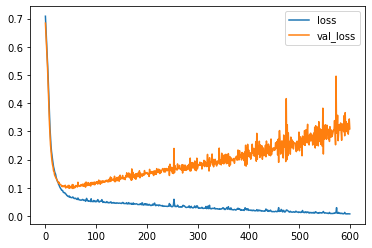

In [53]:
losses.plot()

Above plot is the clear picture of overfitting since up to epoch 50 both losses are decreasing after
that training loss is decreasing but validation loss is increasing that means we have trained our model on training set more 
that's why training loss is decreasing but validation loss is increasing 
means it is not working correctly on validation data since loss is increasing

#### Now we will redefine the model again since its overfitted

In [57]:
model=Sequential()

model.add(Dense(30,activation='relu')) # neuron=30

model.add(Dense(15,activation='relu')) # neuron=15

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid')) # neuron=1  will output 1 or 0 since it's and classification problem last activation is sigmoid

model.compile(loss='binary_crossentropy',optimizer='adam')

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [58]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6873 - val_loss: 0.6707
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6571 - val_loss: 0.6374
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6255 - val_loss: 0.6034
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5900 - val_loss: 0.5663
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5519 - val_loss: 0.5249
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5130 - val_loss: 0.4816
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4711 - val_loss: 0.4393
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4302 - val_loss: 0.3991
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3926 - val_loss: 0.3609
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3590 - val_loss: 0.3287
Epoch 11

In [59]:
model_loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

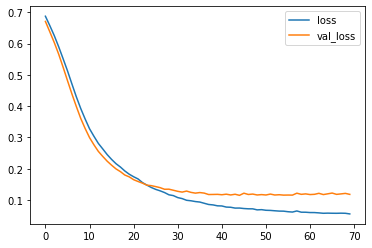

In [60]:
model_loss.plot()

In [62]:
from tensorflow.keras.layers import Dropout

In [63]:
model=Sequential()

model.add(Dense(30,activation='relu')) # neuron=30
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu')) # neuron=15
model.add(Dropout(0.5))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid')) # neuron=1  will output 1 or 0 since it's and classification problem last activation is sigmoid

model.compile(loss='binary_crossentropy',optimizer='adam')

In [64]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 14ms/step - loss: 0.7368 - val_loss: 0.6878
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7099 - val_loss: 0.6700
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6898 - val_loss: 0.6517
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6480 - val_loss: 0.6325
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6392 - val_loss: 0.6093
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6256 - val_loss: 0.5869
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6211 - val_loss: 0.5646
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5960 - val_loss: 0.5475
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6025 - val_loss: 0.5284
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5669 - val_loss: 0.5049
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0998 - val_loss: 0.0997
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1184 - val_loss: 0.1035
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1141 - val_loss: 0.0986
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1435 - val_loss: 0.1006
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1190 - val_loss: 0.1088
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1031 - val_loss: 0.1060
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1023 - val_loss: 0.1051
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1065 - val_loss: 0.1065
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0990 - val_loss: 0.1109
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1097 - val_loss: 0.1016
Epoch 93/600


In [65]:
model_loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

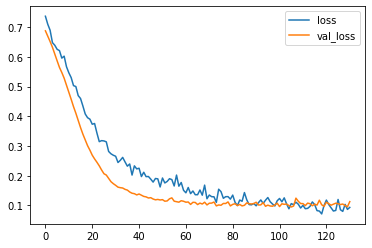

In [66]:
model_loss.plot()

Above plot is the best plot since training loss and validation loss both are going along 

In [67]:
predictions=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [68]:
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [69]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [71]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 4 84]]
